# Stackoverflow
TODO: intro
First time here? run this [Another Cell](#another_cell)

Download 300 pages each containing 30 questons from https://api.stackexchange.com/2.2/questions?page=1&order=desc&sort=activity&site=stackoverflow by executing 
```!gulp stackoverflow --add```

only 300 per day allowed. clicked on the link? 299 left ;)

In [ ]:
!gulp stackoverflow --add 300

In [ ]:
!gulp stackoverflow

TODO: write output like: Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid

## Parse
TODO: write.<br> 
use domjs to get html content, title, code, inlinecode, body. easy to extend.<br>
Merged: 0MB, 32802 Valid-Questions.

| Variable name    | Type             | Description            | Comment |
|------------------|:--------------------|----------------------|--------|
|            $id$  | $\in \mathbb{S}$   |                     | String or number? |
|         $score$  |  $\in \mathbb{N}$  | given by users         | Integer |
|    $isanswered$  |  $\in \mathbb{B}$  |                         | Boolean |
| $answere count$  |  $\in \mathbb{N^{+}}$  |                      | Integer |
|       $created$  |  $\in \mathbb{D}$  | modify or create?   | Date |
|          $tags$  |  $\in \mathbb{S^{?}}$  | ground truth        |  |
|      $title $    |  $\in \mathbb{S}$  |                    | String |
|      $body $     |  $\in \mathbb{S}$  |                     | String |
|      $code $     |  $\in \mathbb{S}$  |                    | String |
|    $inlinecode $ |  $\in \mathbb{S}$  |                    | String |

In [111]:
!gulp text

[06:36:00] Using gulpfile ~/Uni/KDDM2/KDDM2/gulpfile.js
[06:36:00] Starting 'text'...
[06:36:00] Starting '<anonymous>'...
merged and converted
[06:36:45] Finished '<anonymous>' after 46 s
[06:36:45] Finished 'text' after 46 s


In [7]:
%%HTML
<iframe width="100%" height="800" frameBorder="0" 
    src="http://localhost:3002/dist/visualisations/stackoverflow.html"></iframe>

# Preprocessing
TODO: write.<br> 
tasks: sentence, words nouns only (+lemma | stem | raw, +blacklist, +whitelist), ngrams. tf-idf<br> 

In [ ]:
!gulp sentence

In [ ]:
!gulp term

In [6]:
%%HTML
<h2>Title TF: lemmatized, nouns only, +wlist, -blist</h2>
<iframe width="100%" height="300" frameBorder="0" 
    src="http://localhost:3002/dist/visualisations/tfidf.html"></iframe>

## Tf-Idf 
TODO: write.<br>
Stackoverflow: 212MB, 1680 Files, 49860 Raw-Questions, 17058 duplicate, 17 invalid
Merged: 0MB, 32802 Valid-Questions,
we have multiple htmleatures (title, body..), stemming impl and tf variants. 
create set of configurations and safe to file.

|. . . . . . . . . . . . . . . . . ....................Data Type | Description                             | Comment |
|------------------------------------------:|-----------------------------------------|--------|
|    $tf = raw \lor bin \lor log \lor max$  | Term frequency variant                  |        |
|             $df = raw \lor max \lor log$  | Document frequency variant              |        |
|                $vi = nltk \lor sklearn $  | Vecimpl                                 | nltk, sklearn |
|                       $c = T? B? C? I? $  | Question features                  | Title, Body, Code, Inlinecode |
|    $ tf_{min}, df_{min} \in \mathbb{R} $  | filter                                 | nltk, sklearn |
|     $cfg = tf+df+vi+c+tf_{min}+df_{min}$  | Configuration                           |        |
|                 $s_{cfg} \in \mathbb{N}$  | Number of Samples                       | $-$unused |
|                 $f_{cfg} \in \mathbb{N}$  | Number of terms                         |  $-(tf < 25 \lor df < 5)$ |
|                 $q_{cfg} \in \mathbb{N}$  | Number of classes                       | $-$ unused |
|              $S \in \mathbb{S}^{s}_{cfg}$ | Sample Id. (Question Id)                | $s$ wrt. cfg|
|              $F \in \mathbb{S}^{f}_{cfg}$ | Feature names                           | term or ngram |
|     $Y \in \mathbb{B}^{s \times q}_{cfg}$ | sample class vector with same mask as X | $s$ and $q$ wrt. cfg |
|     $R \in \mathbb{N}^{s \times f}_{cfg}$ | tf-raw                                  | $s$ and $f$ wrt. cfg |
|     $X \in \mathbb{R}^{s \times f}_{cfg}$ | tf-idf                                  | $s$ and $f$ wrt. cfg |

fiswt we need to find all pathes (flat index).
than iterate them, and write tfidf for each.
done in 2 steps: plan, to see preview, run, where each tfidf if called, and files are writen.

In [3]:
import tfidftofile
s = (slice('stackoverflow'), slice('lemmatized'), slice('nltk'), slice('00', '32'), slice('T', 'TBC'))
tfidfplan = tfidftofile.plan(s)
tfidfplan

dataframe (72, 11) → select (9, 11)


$r_{c}$ $r_{f}$ $r_{s}$  \
source        wordtype vecimpl tf-idf htmlfeature                           
stackoverflow lemma    nltk    00     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   
                               11     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   
                               32     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   

                                                                          C  \
source        wordtype vecimpl tf-idf htmlfeature                             
stackoverflow lemma    nltk    00     T            Wed May 23 19:02:20 2018   
                                      TB           Wed May 23 19:03:42 2018   
                                      TBC          Wed May 23 19:07:40 2018   
                               11     T            Wed May 23 19:07:48 2018   
                                      TB           Wed May 23 19:09:11 2018   
                                      TBC          Wed May 23 19:12:56 2018   
                               32     T            Wed May 23 19:13:04 2018   
                                      TB           Wed May 23 19:14:27 2018   
                                      TBC          Wed May 23 19:18:10 2018   

                                                                          F  \
source        wordtype vecimpl tf-idf htmlfeature                             
stackoverflow lemma    nltk    00     T            Wed May 23 19:02:20 2018   
                                      TB           Wed May 23 19:03:42 2018   
                                      TBC          Wed May 23 19:07:40 2018   
                               11     T            Wed May 23 19:07:48 2018   
                                      TB           Wed May 23 19:09:11 2018   
                                      TBC          Wed May 23 19:12:56 2018   
                               32     T            Wed May 23 19:13:04 2018   
                                      TB           Wed May 23 19:14:27 2018   
                                      TBC          Wed May 23 19:18:10 2018   

                                                                          R  \
source        wordtype vecimpl tf-idf htmlfeature                             
stackoverflow lemma    nltk    00     T            Wed May 23 19:02:20 2018   
                                      TB           Wed May 23 19:03:41 2018   
                                      TBC          Wed May 23 19:07:38 2018   
                               11     T            Wed May 23 19:07:48 2018   
                                      TB           Wed May 23 19:09:10 2018   
                                      TBC          Wed May 23 19:12:54 2018   
                               32     T            Wed May 23 19:13:04 2018   
                                      TB           Wed May 23 19:14:25 2018   
                                      TBC          Wed May 23 19:18:10 2018   

                                                                          X  \
source        wordtype vecimpl tf-idf htmlfeature                             
stackoverflow lemma    nltk    00     T            Wed May 23 19:02:20 2018   
                                      TB           Wed May 23 19:03:40 2018   
                                      TBC          Wed May 23 19:07:34 2018   
                               11     T            Wed May 23 19:07:48 2018   
                                      TB           Wed May 23 19:09:08 2018   
                                      T

In [2]:
import tfidftofile
tfidf = tfidftofile.run(tfidfplan)
tfidf

select (9, 11)
makedir ./dist/data/stackoverflow/lemma/nltk/32/TBC/


$r_{c}$ $r_{f}$ $r_{s}$  \
source        wordtype vecimpl tf-idf htmlfeature                           
stackoverflow lemma    nltk    00     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   
                               11     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   
                               32     T                 -       -       -   
                                      TB                -       -       -   
                                      TBC               -       -       -   

                                                      C        F  \
source        wordtype vecimpl tf-idf htmlfeature                  
stackoverflow lemma    nltk    00     T            (6,)   (994,)   
                                      TB           (6,)  (2454,)   
                                      TBC          (6,)  (3206,)   
                               11     T            (6,)   (994,)   
                                      TB           (6,)  (2454,)   
                                      TBC          (6,)  (3206,)   
                               32     T            (6,)   (994,)   
                                      TB           (6,)  (2454,)   
                                      TBC          (6,)  (3206,)   

                                                               R  \
source        wordtype vecimpl tf-idf htmlfeature                  
stackoverflow lemma    nltk    00     T              (3573, 994)   
                                      TB           (21132, 2454)   
                                      TBC          (22778, 3206)   
                               11     T              (3573, 994)   
                                      TB           (21132, 2454)   
                                      TBC          (22778, 3206)   
                               32     T              (3573, 994)   
                                      TB           (21132, 2454)   
                                      TBC          (22778, 3206)   

                                                               X           Y  \
source        wordtype vecimpl tf-idf htmlfeature                              
stackoverflow lemma    nltk    00     T              (3573, 994)   (3573, 6)   
                                      TB           (21132, 2454)  (21132, 6)   
                                      TBC          (22778, 3206)  (22778, 6)   
                               11     T              (3573, 994)   (3573, 6)   
                                      TB           (21132, 2454)  (21132, 6)   
                                      TBC          (22778, 3206)  (22778, 6)   
                               32     T              (3573, 994)   (3573, 6)   
                                      TB           (21132, 2454)  (21132, 6)   
                                      TBC          (22778, 3206)  (22778, 6)   

                                                   c     f      s           fr  
source        wordtype vecimpl tf-idf htmlfeature                               
stackoverflow lemma    nltk    00     T            6   994   3573  23234342342  
                                      TB           6  2454  21132  23234342342  
                                      TBC          6  3206  22778  23234342342  
                               11     T            6   994   3573  23234342342  
                                      TB           6  2454  21132  23234342342  
                                      TBC          6  3206  22778  23234342342  
                               32     T            6   994   3573  23234342342  
                                      TB           6  2454  21132  23234342342  
             

In [8]:
# new score, answercount, isanswerde dist
# new T B C I dist
# tfidf plot

In [52]:
%%HTML
<h2>Removed df < 5, diff_df < 3, tf < 25, doclen < 5, preprocessing</h2>
fig: title (cloud, termdist, chars, sentncecount, sentence lenght)
fig: size plot after filter
<iframe width="100%" height="800" frameBorder="0" 
    src="http://localhost:3002/dist/visualisations/stackoverflow.html"></iframe>


# Classification
TODO: write.<br> 
\begin{equation}
  Y=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ tag \in Sample \\
    0, & \text{otherwise}
  \end{array}\right.
\end{equation} 

## Feature selection chi2, mi
TODO: write.<br> 
featuresel 500 chi2, mi for each tag

In [ ]:
tags = ['python', 'php', 'html', 'android', 'javascript', 'sql']

In [39]:
import pandas as pd
import numpy as np

X = np.random.randn(10, 3)
Y = np.random.randn(10, 3)
#df = pd.concat([], 
#    axis=1
#)
pd.DataFrame(X, columns=['$$X_{1}$$','$$X_{...1000...}$$','$$X_{3}$$']),
pd.DataFrame(Y, columns=['$$Y_{android}$$','$$Y_{...234...}$$','$$Y_{zoom}$$']),        
#df.iloc[0, 2] = np.nan
#df.loc[0, 'A'] = np.nan
df.style

In [44]:
%%HTML
Plot top 10, 20? feature +score for on tag
<iframe width="100%" height="300" frameBorder="0" 
    src="http://localhost:3002/dist/visualisations/tfidf.html"></iframe>

## Supervised Algorithms
TODO: write.<br> 

FloatProgress(value=0.0, max=28.0)

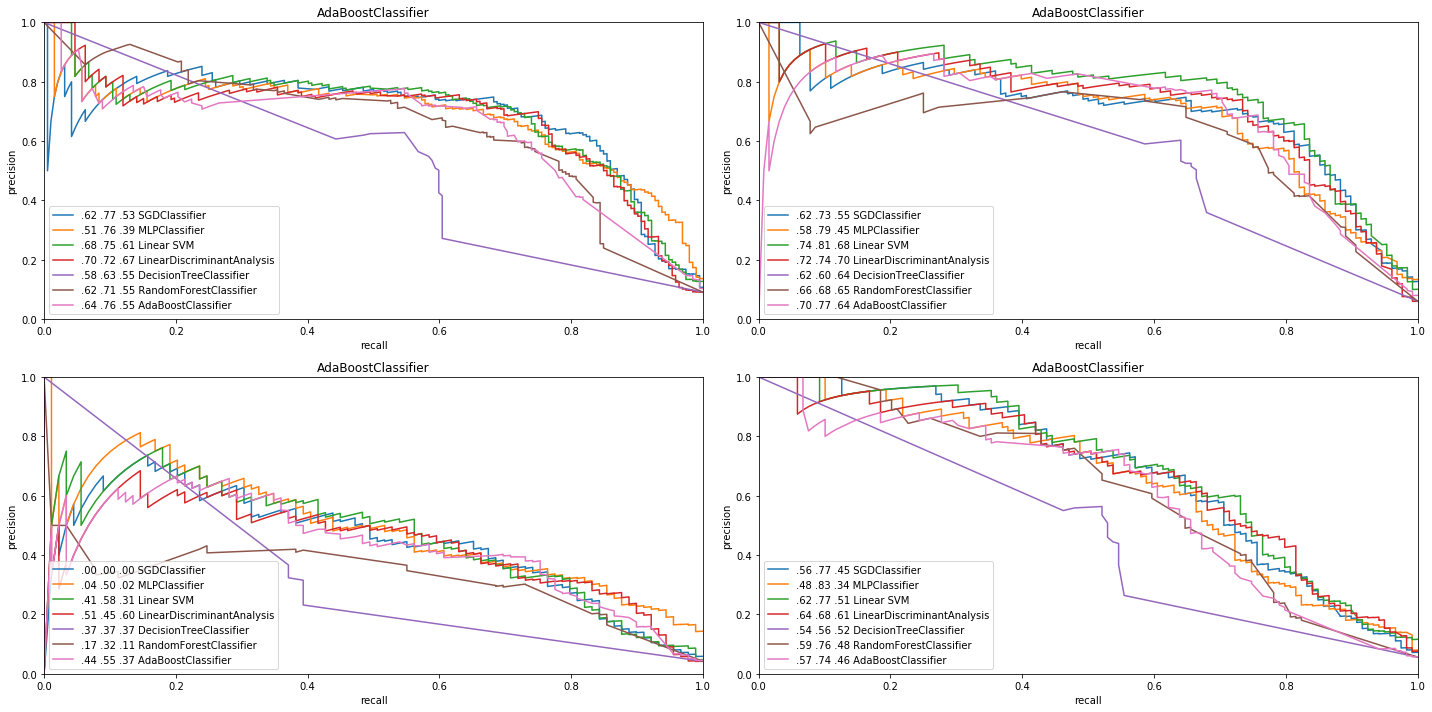

In [141]:
%matplotlib inline
import classify
classify.run('32_title_body', 'chi2', ['python', 'android', 'html', 'php'])

list bad algos. reasons.

# Clustering

TODO: write.<br> 
Load (X, Y, F) for 6 tags 'python',... and apply Classification Pipelines.<br>
Pipeline: (pca, lda, svd, nmf) --> (agglo, kmeans, lda, gmm, dbscan) --> plotgrid(decomp x clusteralgo). <br>

| Name | Data Type                           | Description                             | Comment |
|------| :---                                |-----------------------------------------|--------|
| $s$  | $\in \mathbb{N}$                    | Number Samples                          | random 2000   |
| $t$  | $\in \mathbb{N}$                    | Number of terms                         | reduced by projection |
| $q$  | $\in \mathbb{S}$                    | Analysed tags (labels)                  | ['android'] |
| $F$  | $\in \mathbb{S}^{t}_{q}$            | Feature names                           | useless     |
| $Y$  | $\in \mathbb{B}^{s}_{q}$            | Actual classes                          | just for visualisations |
| $X$  | $\in \mathbb{R}^{s \times t}_{q}$   | tf-idf                                  | transformed  |


find most simmilar to Y(q).

## Decomposition
TODO: write.<br> 

* $t \in \mathbb{N} \longmapsto t_{r} \in \mathbb{N}$
* $F \in \mathbb{S}^{t}_{q} \longmapsto F \in \mathbb{S}^{t_{r}}_{q}$ 
* $X \in \mathbb{R}^{s \times t}_{q} \longmapsto X_{r} \in \mathbb{R}^{s \times t_{r}}_{q}$

internal dimension is for all projections the same,<br>
but varies with cluster algo.
most use 25, except DBscan, it used 5. Db scan has problems with dim > 50 in general.


## Unsupervised Algorithms

TODO: write.<br> 
applied to each composition

Plot rrecision recall for each tag❌algo.

FloatProgress(value=0.0, max=4.0)

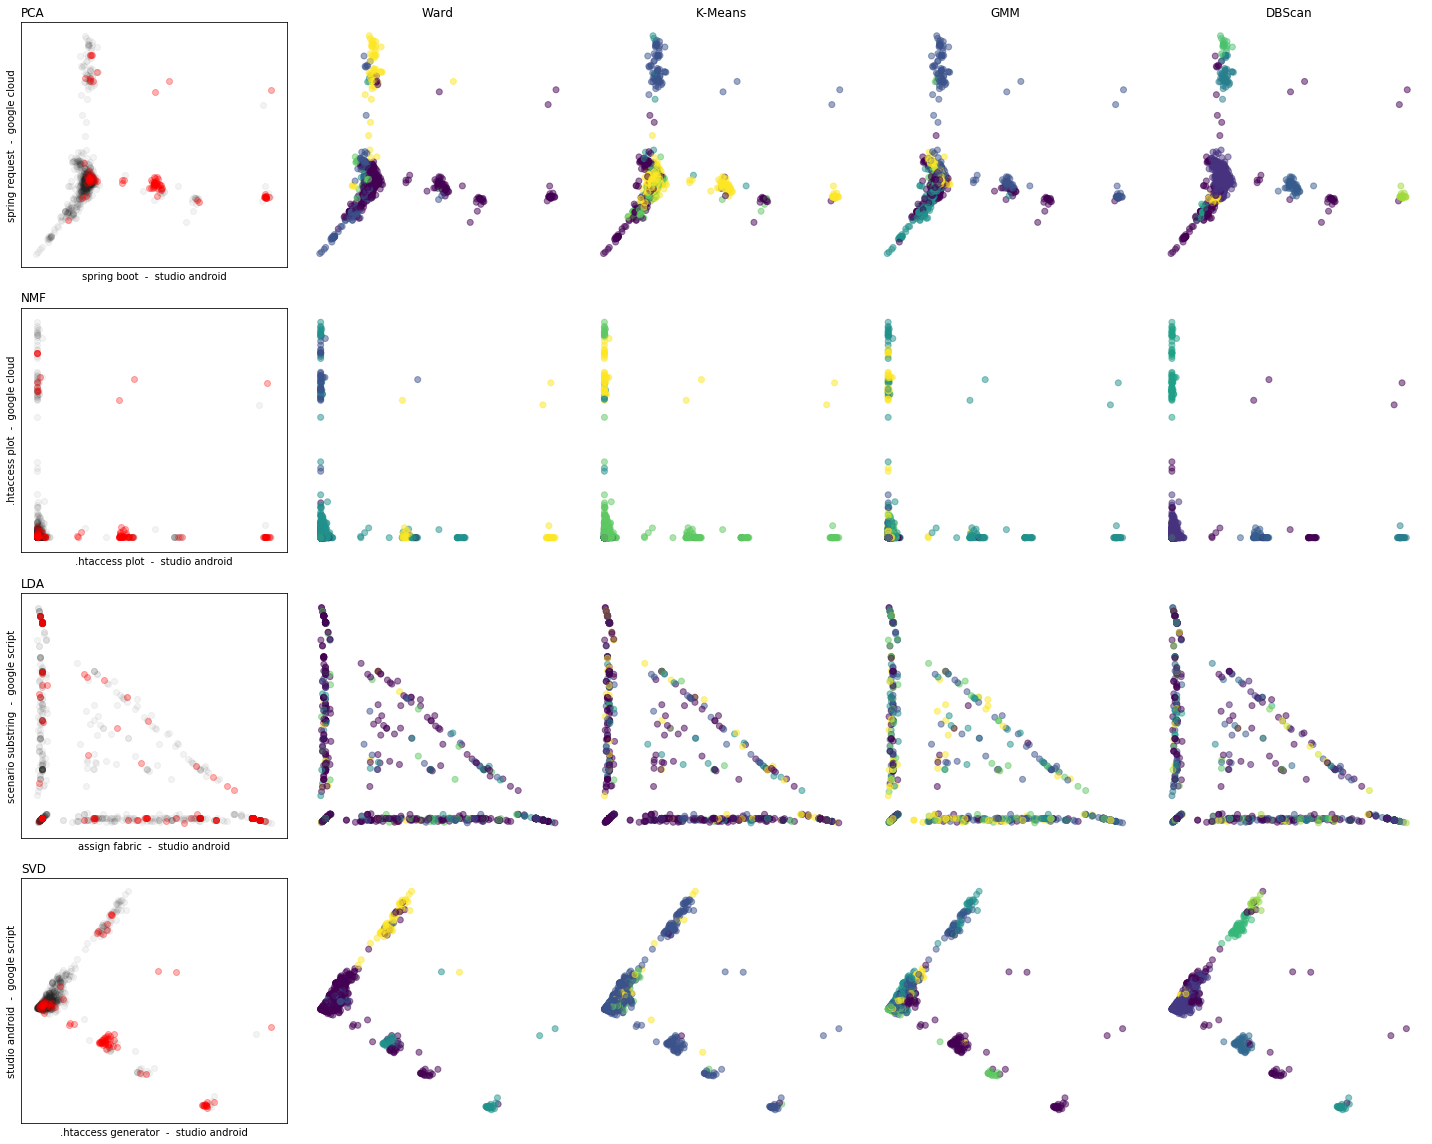

In [140]:
%matplotlib inline
import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD'] # PCA NMF LDA SVD FastICA FA Dict
algos = ['Ward', 'K-Means', 'GMM', 'DBScan']  # Ward K-Means GMM DBScan Affinity
#node.update ('11_title_body', decompositions, algos, 1000, 'sql')
cluster.run('11_title', decompositions, algos, 2000, 'android')

In [ ]:
find best matching cluster (maybe vary cluster count)

In [4]:
%matplotlib inline
import cluster
decompositions = ['PCA', 'NMF', 'LDA', 'SVD'] # PCA NMF LDA SVD FastICA FA Dict
algos = ['Ward', 'K-Means', 'GMM', 'DBScan']  # Ward K-Means GMM DBScan Affinity
#node.update ('11_title_body', decompositions, algos, 1000, 'sql')
cluster.runPlotly('11_title', decompositions, algos, 2000, 'android')


In [32]:
import numpy as np
import plotly.plotly as py
import pandas as pd

df2 = pd.DataFrame({
    'A' : 1.,
    'B' : pd.Timestamp('20130102'),
    'C' : pd.Series(1,index=list(range(4)), dtype='float32'),
    'D' : np.array([3] * 4, dtype='int32'),
    'E' : pd.Categorical(["test","train","test","train"]),
    'F' : 'foo' 
})

df2.style


# Hierarchical Clustering (ward)

TODO: write.<br> 
for each projection (svd, pca, lda) scipy.linkage(ward) algo <br>    
    --> for each node find decendantes, sum up raw tf, find top 3, safe tree

In [7]:
import hierarchy
hierarchy.run('11_title', ['SVD', 'LDA', 'PCA'], [10, 20], 'ground truth')

F (993,) ['.htaccess' '.net' '.net core' 'account' 'accuracy' 'action' 'active'
 'activity' 'adapter' 'addition' 'address' 'admin' 'agent' 'ajax' 'alert'
 'algorithm' 'align' 'allow' 'amazon' 'amount' 'analysis' 'analytics'
 'anchor' 'android' 'android studio' 'angular' 'angular2' 'angularjs'
 'animation' 'annotation' 'apache' 'apache spark' 'apis' 'apk' 'appium'
 'approach' 'apps' 'arduino' 'area' 'arm' 'arraylist' 'arrow' 'asp.net'
 'asp.net core' 'asp.net mvc' 'assembly' 'assertion' 'asset' 'assign'
 'assignment' 'async' 'athena' 'attachment' 'attempt' 'audio' 'auth'
 'auto' 'automation' 'average' 'aws' 'aws lambda' 'axis' 'azure'
 'azure service' 'backend' 'background' 'background color' 'backup' 'bad'
 'bar' 'base' 'base64' 'bash' 'bash script' 'batch' 'bean' 'behavior'
 'behaviour' 'bigquery' 'binary' 'bind' 'binding' 'bit' 'bitmap' 'blank'
 'blob' 'block' 'bluetooth' 'body' 'boost' 'boot' 'bootstrap' 'border'
 'bot' 'bottom' 'bound' 'box' 'branch' 'break' 'browser' 'bucket' 'buf

nodemat (3581, 993)
XL (3581, 993)
zlen 3580 (3580, 4)
all terms shape (1, 993)


TypeError: sequence item 0: expected str instance, numpy.ndarray found

In [50]:
%%HTML
<iframe width="100%" height="700" frameBorder="0"
    src="http://localhost:3002/dist/visualisations/tree.html"></frame>

# Install

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
#!gulp 

In [9]:
!pip3 install pandas

import plotly
plotly.tools.set_credentials_file(username='MichaelGlatzhofer', api_key='6fkzLsxb00TXcV1OmA52')

Traceback (most recent call last):
  File "/usr/bin/pip3", line 9, in <module>
    from pip import main
ImportError: cannot import name 'main'
